# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn >= 0.20.

In [2]:
# Python >= 3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [12]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

Saving figure some_digit_plot


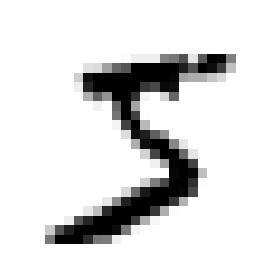

In [13]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [22]:
y = y.astype(np.uint8)

In [23]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [24]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


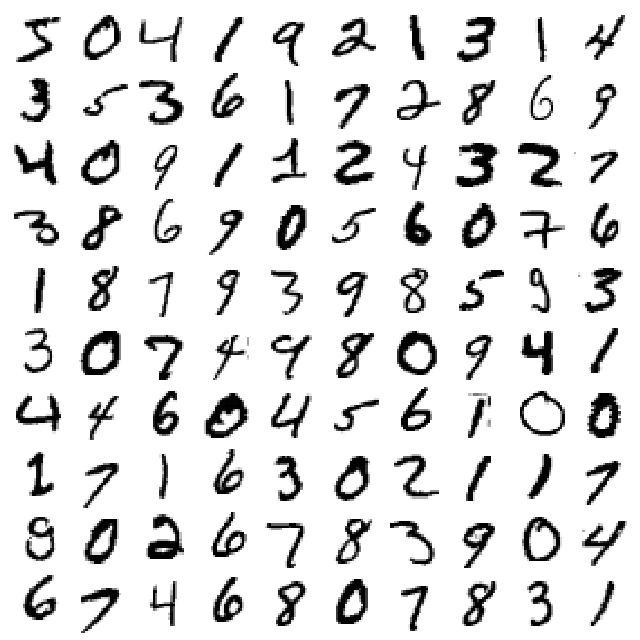

In [25]:
plt.figure(figsize=(9, 9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [26]:
y[0]

5

In [27]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary classifier

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

**Note**: some hyperparameters will have a different default value in future versions of Scikit-Learn, such as `max_iter` and `tol`. To be future-proof, we explicitly set these hyperparameters to their future default values. For simplicity, this is not shown in the book

In [36]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
sgd_clf.predict([some_digit])

array([ True])

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

-- Epoch 1
Norm: 10699.90, NNZs: 626, Bias: 6.879106, T: 40000, Avg. loss: 131942.802374
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 6389.14, NNZs: 633, Bias: 15.332532, T: 80000, Avg. loss: 21113.183759
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 4724.99, NNZs: 643, Bias: 19.900779, T: 120000, Avg. loss: 12323.897952
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3932.54, NNZs: 643, Bias: 22.493964, T: 160000, Avg. loss: 8402.601105
Total training time: 0.26 seconds.
-- Epoch 5
Norm: 3351.57, NNZs: 645, Bias: 25.325003, T: 200000, Avg. loss: 6536.952358
Total training time: 0.35 seconds.
-- Epoch 6
Norm: 2999.56, NNZs: 645, Bias: 27.709423, T: 240000, Avg. loss: 5420.110699
Total training time: 0.40 seconds.
-- Epoch 7
Norm: 2682.53, NNZs: 645, Bias: 30.219059, T: 280000, Avg. loss: 4519.289343
Total training time: 0.45 seconds.
-- Epoch 8
Norm: 2469.50, NNZs: 647, Bias: 31.662522, T: 320000, Avg. loss: 3826.925667
Total training time: 0.51 seconds.
-- Epoch 9
Nor

Norm: 502.87, NNZs: 668, Bias: 59.714051, T: 2840000, Avg. loss: 409.913400
Total training time: 3.74 seconds.
-- Epoch 72
Norm: 497.91, NNZs: 668, Bias: 59.899326, T: 2880000, Avg. loss: 393.852175
Total training time: 3.79 seconds.
-- Epoch 73
Norm: 494.28, NNZs: 668, Bias: 60.044136, T: 2920000, Avg. loss: 396.965934
Total training time: 3.84 seconds.
-- Epoch 74
Norm: 487.12, NNZs: 668, Bias: 60.203836, T: 2960000, Avg. loss: 392.165088
Total training time: 3.89 seconds.
-- Epoch 75
Norm: 481.35, NNZs: 668, Bias: 60.374989, T: 3000000, Avg. loss: 379.183393
Total training time: 3.93 seconds.
-- Epoch 76
Norm: 478.79, NNZs: 669, Bias: 60.550287, T: 3040000, Avg. loss: 371.648792
Total training time: 3.98 seconds.
-- Epoch 77
Norm: 473.61, NNZs: 669, Bias: 60.697075, T: 3080000, Avg. loss: 377.581719
Total training time: 4.03 seconds.
-- Epoch 78
Norm: 467.84, NNZs: 669, Bias: 60.874623, T: 3120000, Avg. loss: 357.909476
Total training time: 4.07 seconds.
-- Epoch 79
Norm: 463.41, NN

Norm: 294.24, NNZs: 670, Bias: 68.509483, T: 5640000, Avg. loss: 199.725745
Total training time: 7.28 seconds.
-- Epoch 142
Norm: 292.92, NNZs: 670, Bias: 68.599596, T: 5680000, Avg. loss: 200.196501
Total training time: 7.34 seconds.
-- Epoch 143
Norm: 290.91, NNZs: 670, Bias: 68.662741, T: 5720000, Avg. loss: 198.328151
Total training time: 7.41 seconds.
-- Epoch 144
Norm: 289.86, NNZs: 670, Bias: 68.746357, T: 5760000, Avg. loss: 199.145078
Total training time: 7.46 seconds.
-- Epoch 145
Norm: 287.16, NNZs: 670, Bias: 68.812062, T: 5800000, Avg. loss: 197.526996
Total training time: 7.51 seconds.
-- Epoch 146
Norm: 285.87, NNZs: 670, Bias: 68.875637, T: 5840000, Avg. loss: 197.826021
Total training time: 7.56 seconds.
-- Epoch 147
Norm: 285.19, NNZs: 670, Bias: 68.974587, T: 5880000, Avg. loss: 190.992375
Total training time: 7.60 seconds.
-- Epoch 148
Norm: 283.32, NNZs: 671, Bias: 69.071210, T: 5920000, Avg. loss: 194.082712
Total training time: 7.64 seconds.
-- Epoch 149
Norm: 28

Norm: 935.78, NNZs: 651, Bias: 80.867832, T: 1240000, Avg. loss: 880.268662
Total training time: 2.04 seconds.
-- Epoch 32
Norm: 911.34, NNZs: 651, Bias: 81.224472, T: 1280000, Avg. loss: 865.860072
Total training time: 2.12 seconds.
-- Epoch 33
Norm: 892.77, NNZs: 653, Bias: 81.609184, T: 1320000, Avg. loss: 847.180023
Total training time: 2.20 seconds.
-- Epoch 34
Norm: 872.06, NNZs: 653, Bias: 82.048108, T: 1360000, Avg. loss: 782.886544
Total training time: 2.29 seconds.
-- Epoch 35
Norm: 860.37, NNZs: 654, Bias: 82.374715, T: 1400000, Avg. loss: 766.769959
Total training time: 2.36 seconds.
-- Epoch 36
Norm: 839.33, NNZs: 654, Bias: 82.726727, T: 1440000, Avg. loss: 744.573229
Total training time: 2.44 seconds.
-- Epoch 37
Norm: 824.72, NNZs: 654, Bias: 82.979675, T: 1480000, Avg. loss: 730.037333
Total training time: 2.52 seconds.
-- Epoch 38
Norm: 804.89, NNZs: 654, Bias: 83.372397, T: 1520000, Avg. loss: 716.858013
Total training time: 2.59 seconds.
-- Epoch 39
Norm: 789.60, NN

Norm: 424.35, NNZs: 662, Bias: 96.156078, T: 3920000, Avg. loss: 277.658197
Total training time: 5.73 seconds.
-- Epoch 99
Norm: 420.21, NNZs: 662, Bias: 96.282969, T: 3960000, Avg. loss: 270.926575
Total training time: 5.79 seconds.
-- Epoch 100
Norm: 417.07, NNZs: 662, Bias: 96.418728, T: 4000000, Avg. loss: 262.569929
Total training time: 5.83 seconds.
-- Epoch 101
Norm: 414.10, NNZs: 662, Bias: 96.572823, T: 4040000, Avg. loss: 259.828828
Total training time: 5.88 seconds.
-- Epoch 102
Norm: 413.24, NNZs: 663, Bias: 96.713218, T: 4080000, Avg. loss: 262.905767
Total training time: 5.93 seconds.
-- Epoch 103
Norm: 409.92, NNZs: 663, Bias: 96.793636, T: 4120000, Avg. loss: 253.632733
Total training time: 5.98 seconds.
-- Epoch 104
Norm: 408.03, NNZs: 663, Bias: 96.933576, T: 4160000, Avg. loss: 255.636796
Total training time: 6.02 seconds.
-- Epoch 105
Norm: 405.66, NNZs: 663, Bias: 97.041246, T: 4200000, Avg. loss: 250.209678
Total training time: 6.07 seconds.
-- Epoch 106
Norm: 403

Norm: 297.44, NNZs: 664, Bias: 103.283492, T: 6680000, Avg. loss: 155.394242
Total training time: 9.03 seconds.
Convergence after 167 epochs took 9.03 seconds
-- Epoch 1
Norm: 11086.91, NNZs: 611, Bias: 40.743395, T: 40000, Avg. loss: 130368.205134
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 6919.77, NNZs: 624, Bias: 47.856565, T: 80000, Avg. loss: 19844.816411
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 5177.80, NNZs: 625, Bias: 51.591183, T: 120000, Avg. loss: 11007.902867
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 4163.08, NNZs: 629, Bias: 54.220993, T: 160000, Avg. loss: 8005.038912
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 3556.71, NNZs: 633, Bias: 56.749653, T: 200000, Avg. loss: 6140.773441
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 3150.77, NNZs: 639, Bias: 59.239640, T: 240000, Avg. loss: 4974.477372
Total training time: 0.30 seconds.
-- Epoch 7
Norm: 2844.03, NNZs: 641, Bias: 60.909313, T: 280000, Avg. loss: 4161.526945
Total traini

Norm: 555.99, NNZs: 655, Bias: 84.828485, T: 2760000, Avg. loss: 387.468878
Total training time: 3.13 seconds.
-- Epoch 70
Norm: 550.90, NNZs: 655, Bias: 84.979744, T: 2800000, Avg. loss: 379.557506
Total training time: 3.19 seconds.
-- Epoch 71
Norm: 545.07, NNZs: 655, Bias: 85.110773, T: 2840000, Avg. loss: 368.267398
Total training time: 3.24 seconds.
-- Epoch 72
Norm: 537.46, NNZs: 655, Bias: 85.226095, T: 2880000, Avg. loss: 369.062177
Total training time: 3.28 seconds.
-- Epoch 73
Norm: 530.54, NNZs: 655, Bias: 85.394917, T: 2920000, Avg. loss: 362.785107
Total training time: 3.33 seconds.
-- Epoch 74
Norm: 524.29, NNZs: 655, Bias: 85.496741, T: 2960000, Avg. loss: 357.770505
Total training time: 3.38 seconds.
-- Epoch 75
Norm: 518.45, NNZs: 655, Bias: 85.614230, T: 3000000, Avg. loss: 344.931372
Total training time: 3.43 seconds.
-- Epoch 76
Norm: 514.85, NNZs: 655, Bias: 85.792995, T: 3040000, Avg. loss: 335.860819
Total training time: 3.48 seconds.
-- Epoch 77
Norm: 511.49, NN

array([0.95035, 0.96035, 0.9604 ])

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [41]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [42]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5, cv=3)

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [44]:
y_train_perfect_predictions = y_train_5 # for testing purposes
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [48]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [49]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [47]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [51]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [55]:
threshold = 2165
y_scores > threshold

array([False])

In [56]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [60]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

### Plot the precision recall curve for binary classifier with decision_function

Saving figure precision_recall_vs_threshold_plot


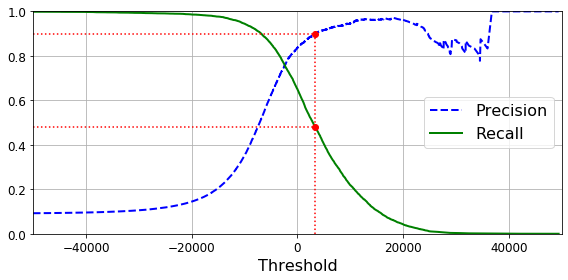

In [61]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

### Plot vs. Recall plot

Saving figure precision_vs_recall_plot


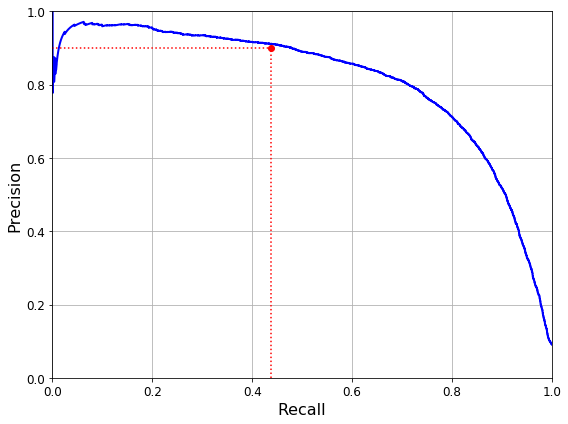

In [62]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [63]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [64]:
threshold_90_precision

3370.0194991439594

In [65]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [66]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [67]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# ROC Curves

In [69]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


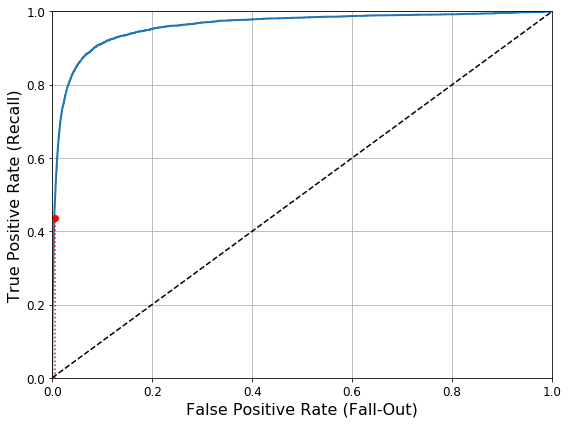

In [70]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rfc_clf.fit(X_train, y_train_5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [82]:
y_forest_probas = cross_val_predict(rfc_clf, X_train, y_train_5, cv=3, method="predict_proba")
len(y_forest_probas)

60000

In [83]:
y_scores = y_forest_probas[:, 1]
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_comparison_plot


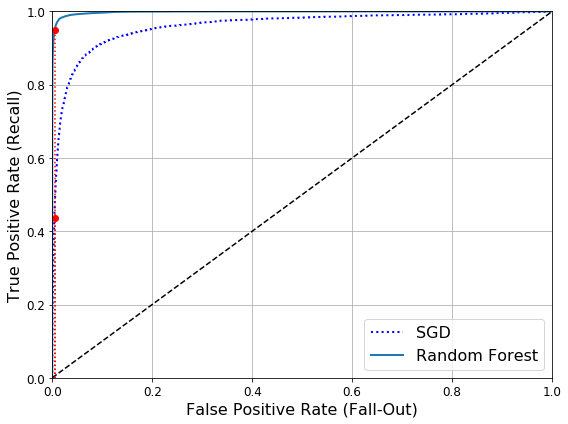

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [85]:
roc_auc_score(y_train_5, y_scores)

0.9983436731328145

In [86]:
y_scores[:10]

array([0.89, 0.01, 0.04, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.01])

In [88]:
y_train_pred_forest = cross_val_predict(rfc_clf, X_train, y_train_5, cv=3)
len(y_train_pred_forest)

60000

In [89]:
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [90]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Multiclass classification

In [91]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [92]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [93]:
np.argmax(some_digit_scores)

5

In [96]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [98]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [106]:
ovr_clf.estimators_[1]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [107]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [109]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [111]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [117]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

KeyboardInterrupt: 

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [ ]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel classification

# Exercises

1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

2. Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel*. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally , train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

*You can use the shift() function from the scipy.ndimage.interpolation module. For example, shift(image, [2, 1], cval=0) shifts the image two pixels down and one pixel to the right

3. Tackle the Titanic dataset. A great place to start is on Kaggle (https://www.kaggle.com/c/titanic).

4. Build a spam classifier (a more challenging exercise):

    * Download examples of spam and ham from Apache SpamAssassin's public datasets (https://homl.info/spamassassin).
    * Unzip the datasets and familiarize yourself with the data format
    * Split the datasets into a training set and a test set
    * Write a data preparation pipline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, "Hello", "how", "are", "you", then the email "Hello you Hello Hello you" would be converted into a vector [1, 0, 0, 1] (meaning ["Hello" is present, "how" is absent, "are" is absent, "you" is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.

    * You may way to add hyperparameters to your prepareation pipeline to control whether or not to strip off email headers, conver each email to lowercase, remove punctuation, replace all URLs with "URL", replace all numbers with "NUMBER", or even perform stemming (ie., trim word endings; there are Python libraries available to do this).

    * Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.